In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
methods = ["cv2.TM_CCOEFF","cv2.TM_CCOEFF_NORMED",
           "cv2.TM_CCORR","cv2.TM_CCORR_NORMED",
           "cv2.TM_SQDIFF","cv2.TM_SQDIFF_NORMED"]

In [9]:
face = cv2.cvtColor(cv2.imread("D:\Python files\Computer-Vision-with-Python\DATA\sammy_face.jpg"), cv2.COLOR_BGR2RGB)
full = cv2.cvtColor(cv2.imread("D:\Python files\Computer-Vision-with-Python\DATA\sammy.jpg"), cv2.COLOR_BGR2RGB)

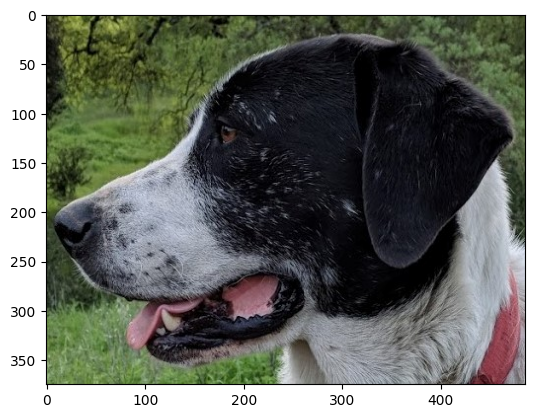

In [10]:
plt.imshow(face)

In [ ]:
result = {}

In [28]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)

    res = cv2.matchTemplate(full_copy, face, method)
    result[m] = res
    min_val, max_val, min_loc, max_loc  = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width , channels = face.shape

    bottom_right = (top_left[0]+width, top_left[1] + height)
    cv2.rectangle(full_copy, top_left, bottom_right,(255,0,0), thickness= 10)
    result[f"{m} Result"] = full_copy



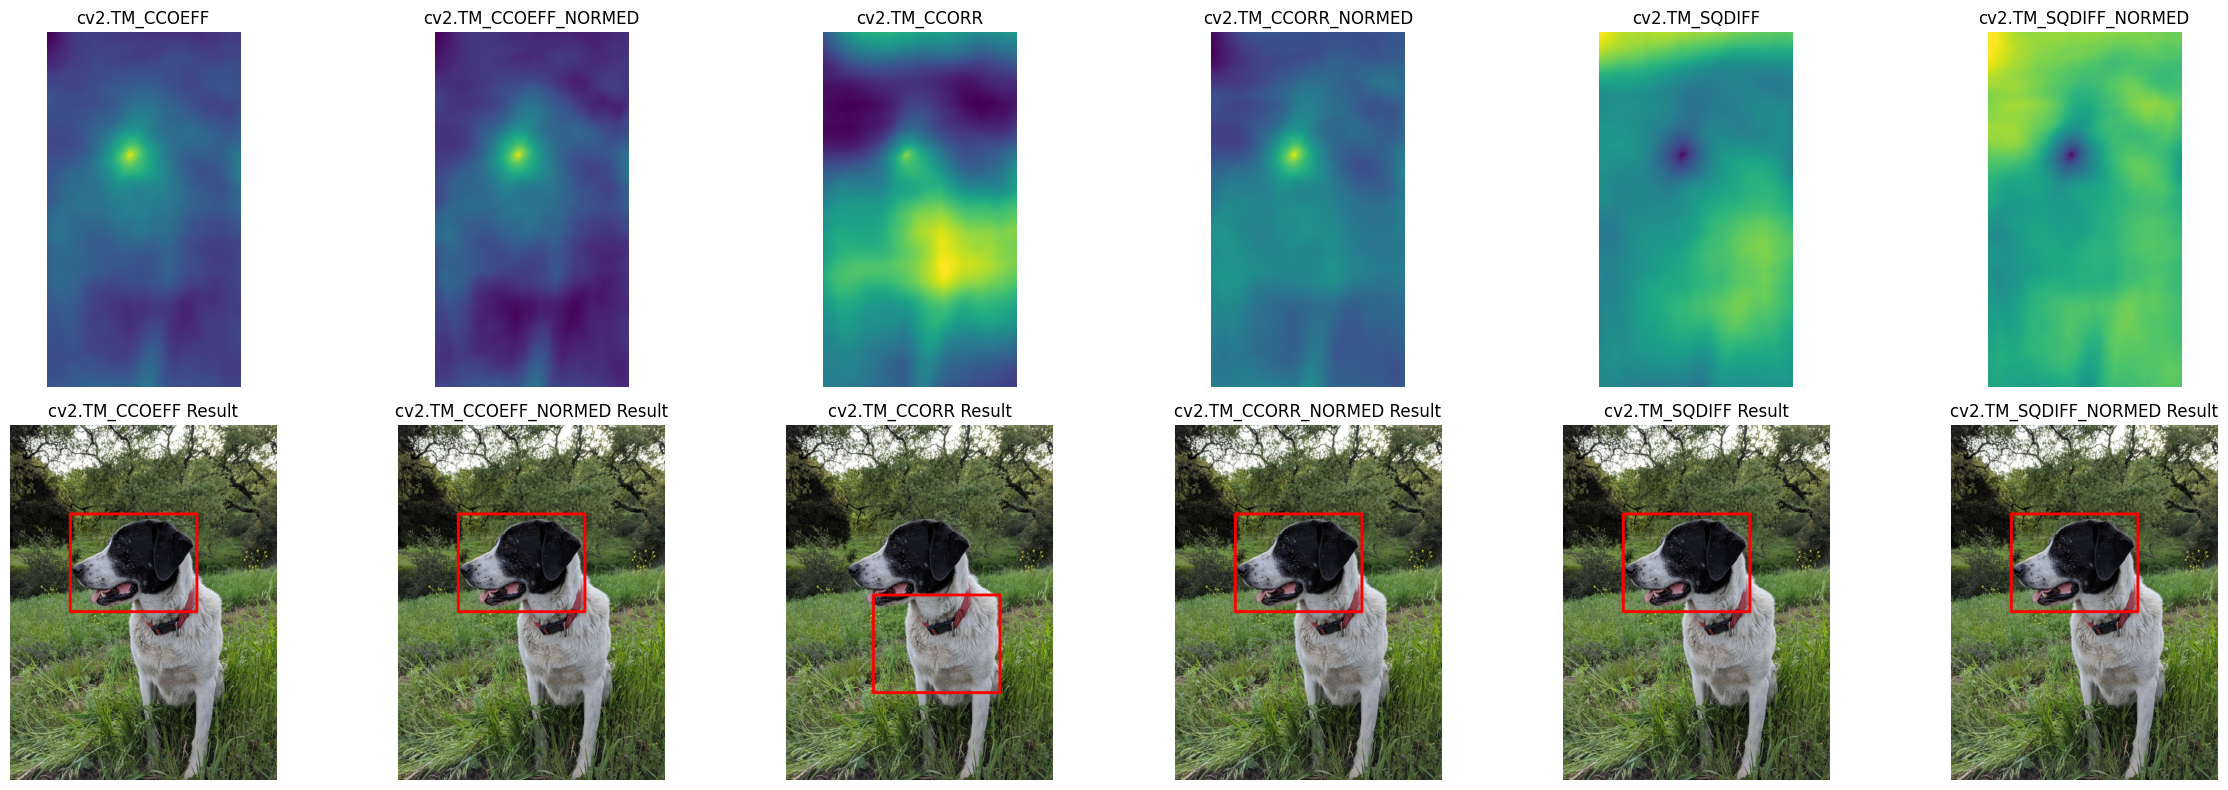

In [29]:
fig, axes = plt.subplots(2, 6, figsize=(24, 8))

for idx, value in enumerate(result):
    r = idx // 6
    c = idx % 6
    axes[r, c].imshow(result[value])
    axes[r, c].set_title(value)
    axes[r, c].axis("off")

plt.tight_layout()
plt.show()
